In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv("hospital data analysis.csv")

In [11]:
# Display basic dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_ID      984 non-null    int64 
 1   Age             984 non-null    int64 
 2   Gender          984 non-null    object
 3   Condition       984 non-null    object
 4   Procedure       984 non-null    object
 5   Cost            984 non-null    int64 
 6   Length_of_Stay  984 non-null    int64 
 7   Readmission     984 non-null    object
 8   Outcome         984 non-null    object
 9   Satisfaction    984 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 77.0+ KB
None


In [12]:
# Show the first few rows
print(df.head())

   Patient_ID  Age  Gender      Condition                 Procedure   Cost  \
0           1   45  Female  Heart Disease               Angioplasty  15000   
1           2   60    Male       Diabetes           Insulin Therapy   2000   
2           3   32  Female  Fractured Arm          X-Ray and Splint    500   
3           4   75    Male         Stroke    CT Scan and Medication  10000   
4           5   50  Female         Cancer  Surgery and Chemotherapy  25000   

   Length_of_Stay Readmission    Outcome  Satisfaction  
0               5          No  Recovered             4  
1               3         Yes     Stable             3  
2               1          No  Recovered             5  
3               7         Yes     Stable             2  
4              10          No  Recovered             4  


In [13]:
# Check for missing values
print(df.isnull().sum())


Patient_ID        0
Age               0
Gender            0
Condition         0
Procedure         0
Cost              0
Length_of_Stay    0
Readmission       0
Outcome           0
Satisfaction      0
dtype: int64


In [14]:
# # Fill missing numerical values with mean
# df.fillna(df.mean(numeric_only=True), inplace=True)

# # Fill missing categorical values with "Unknown"
# df.fillna("Unknown", inplace=True)

In [16]:
# Summary statistics
print(df.describe())

# Distribution of age groups
df["Age_Group"] = pd.cut(df["Age"], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])
print(df["Age_Group"].value_counts())

        Patient_ID         Age          Cost  Length_of_Stay  Satisfaction
count   984.000000  984.000000    984.000000      984.000000    984.000000
mean    500.329268   53.754065   8367.479675       37.663618      3.598577
std     288.979531   14.941135   7761.990976       19.595805      0.883002
min       1.000000   25.000000    100.000000        1.000000      2.000000
25%     250.750000   45.000000   1000.000000       21.000000      3.000000
50%     500.500000   55.000000   6000.000000       38.000000      4.000000
75%     750.250000   65.000000  15000.000000       54.250000      4.000000
max    1000.000000   78.000000  25000.000000       76.000000      5.000000
Age_Group
51-65    391
65+      231
19-35    197
36-50    165
0-18       0
Name: count, dtype: int64


In [17]:
# Count patients by gender
print(df["Gender"].value_counts())


Gender
Female    524
Male      460
Name: count, dtype: int64


In [20]:
df.value_counts()

,,,,,,,,,,,count
Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction,Age_Group,
1000,25,Male,Allergic Reaction,Epinephrine Injection,100,68,No,Recovered,5,19-35,1
1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4,36-50,1
2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3,51-65,1
3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5,19-35,1
4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2,65+,1
...,...,...,...,...,...,...,...,...,...,...,...
13,30,Female,Childbirth,Delivery and Postnatal Care,12000,3,No,Recovered,4,19-35,1
12,65,Male,Prostate Cancer,Radiation Therapy,20000,9,No,Recovered,3,51-65,1
11,48,Female,Respiratory Infection,Antibiotics and Rest,800,2,No,Stable,4,36-50,1


In [21]:
print(df["Condition"].value_counts())

Condition
Fractured Leg            67
Heart Attack             67
Fractured Arm            66
Hypertension             66
Appendicitis             66
Cancer                   66
Stroke                   66
Allergic Reaction        66
Diabetes                 65
Heart Disease            65
Respiratory Infection    65
Prostate Cancer          65
Childbirth               65
Kidney Stones            65
Osteoarthritis           64
Name: count, dtype: int64


<ipython-input-22-3633d37b81b3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Condition"], order=df["Condition"].value_counts().index, palette='coolwarm')


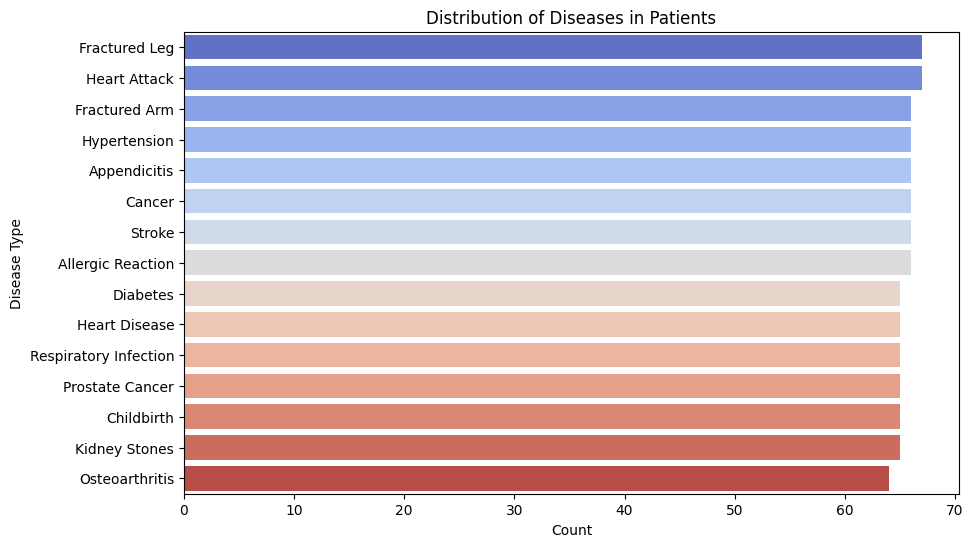

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(y=df["Condition"], order=df["Condition"].value_counts().index, palette='coolwarm')
plt.xlabel("Count")
plt.ylabel("Disease Type")
plt.title("Distribution of Diseases in Patients")
plt.show()

<ipython-input-23-669ae8b2fd6d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Age_Group"], palette='viridis')


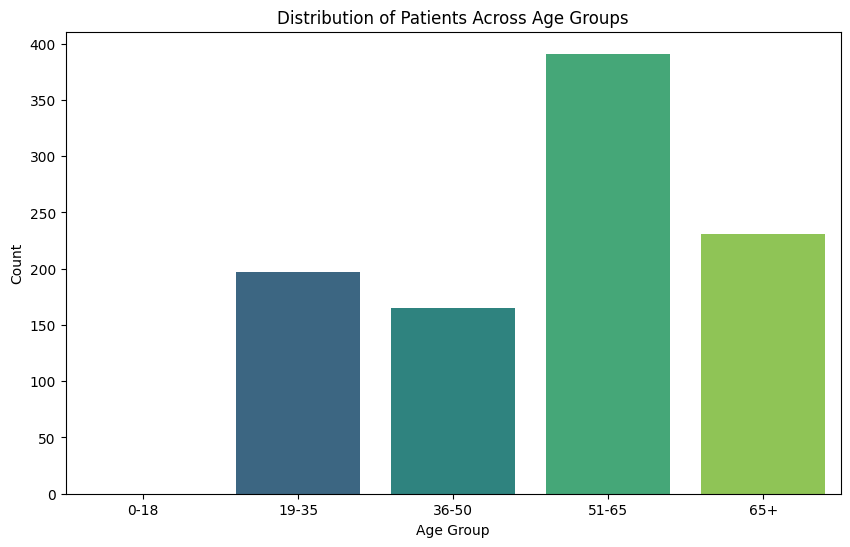

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df["Age_Group"], palette='viridis')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Patients Across Age Groups")
plt.show()

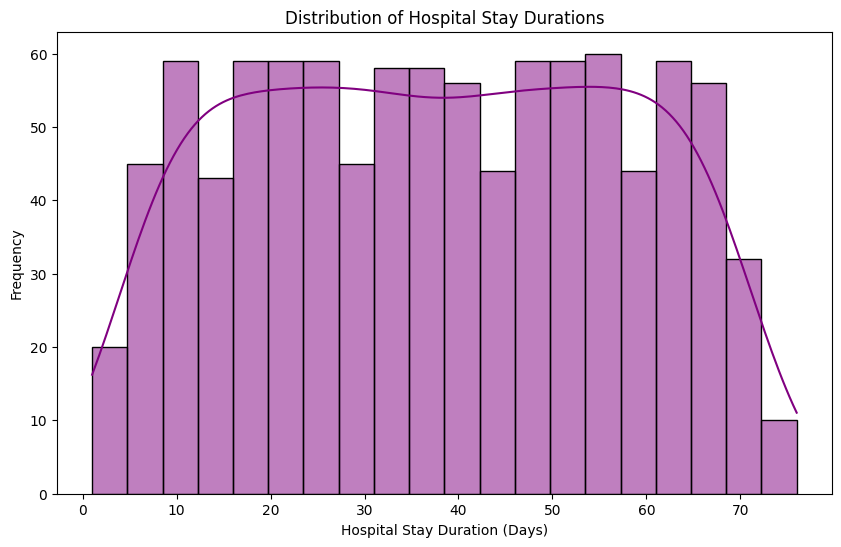

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Length_of_Stay"], bins=20, kde=True, color='purple')
plt.xlabel("Hospital Stay Duration (Days)")
plt.ylabel("Frequency")
plt.title("Distribution of Hospital Stay Durations")
plt.show()

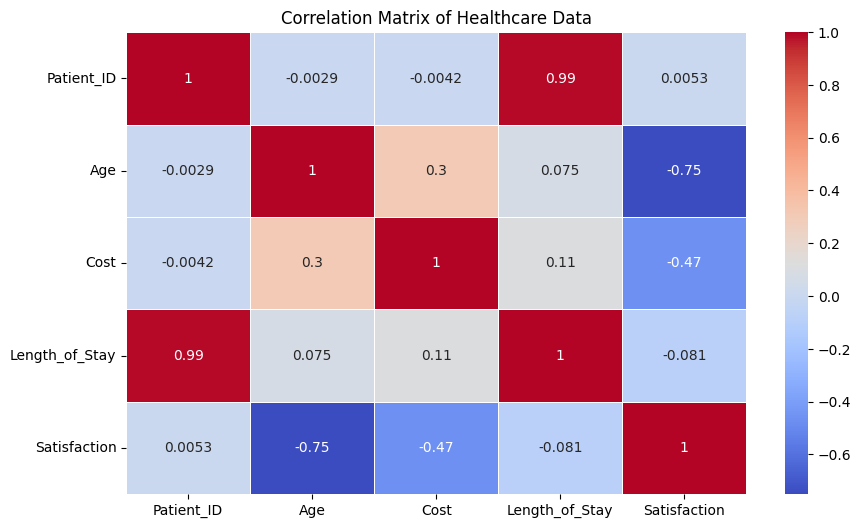

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Healthcare Data")
plt.show()

In [28]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Condition', 'Procedure', 'Cost',
       'Length_of_Stay', 'Readmission', 'Outcome', 'Satisfaction',
       'Age_Group'],
      dtype='object')